In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
del_time = pd.read_csv('delivery_time.csv')

In [3]:
del_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
del_time= del_time.drop_duplicates()

In [6]:
del_time.shape

(21, 2)

In [7]:
del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1dec58d3340>,
 'caps': [<matplotlib.lines.Line2D at 0x1dec58d38e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dec58d3070>,
 'medians': [<matplotlib.lines.Line2D at 0x1dec58d3e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dec58ea190>,
 'means': []}

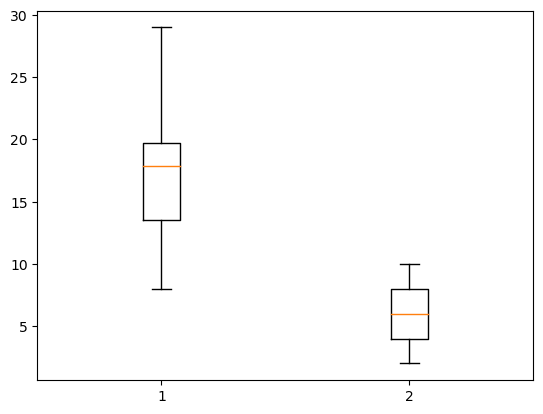

In [8]:
plt.boxplot(del_time)

In [9]:
del_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
del_time = del_time.rename({'Delivery Time': 'DTime','Sorting Time':'STime'}, axis=1)

In [11]:
import statsmodels.formula.api as smf
model= smf.ols("DTime~STime",data = del_time).fit()

In [12]:
model.params

Intercept    6.582734
STime        1.649020
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        18:47:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
STime          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
STime,1.108673,2.189367


In [15]:
pred = model.predict(del_time.iloc[:,1])

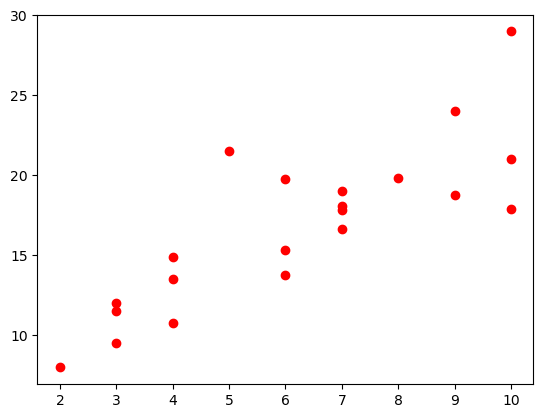

In [16]:
plt.scatter(x= del_time['STime'],y=del_time['DTime'],color = 'red');

In [17]:
pred.corr(del_time.DTime)

0.8259972607955327

# Transforming Variables for accuracy

In [18]:
#Logarithmic model
model2= smf.ols('DTime~np.log(STime)',data= del_time).fit()

In [19]:
model2.params

Intercept        1.159684
np.log(STime)    9.043413
dtype: float64

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        18:47:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(STime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2 = model2.predict(pd.DataFrame(del_time['STime']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Actual')

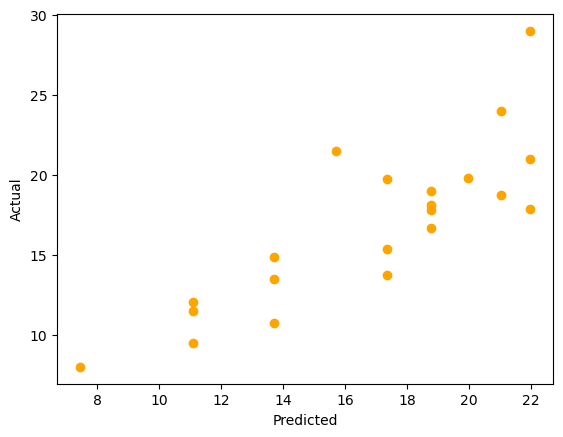

In [22]:
plt.scatter(x= pred2,y=del_time.DTime,color = 'orange')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:
# Exponential Transformation
model3= smf.ols('np.log(DTime)~STime',data = del_time).fit()

In [24]:
model3.params

Intercept    2.121372
STime        0.105552
dtype: float64

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(DTime)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                        18:47:12   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
STime          0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
pred_log = model3.predict(pd.DataFrame(del_time['STime']))

In [27]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [28]:
pred3= np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'Actual')

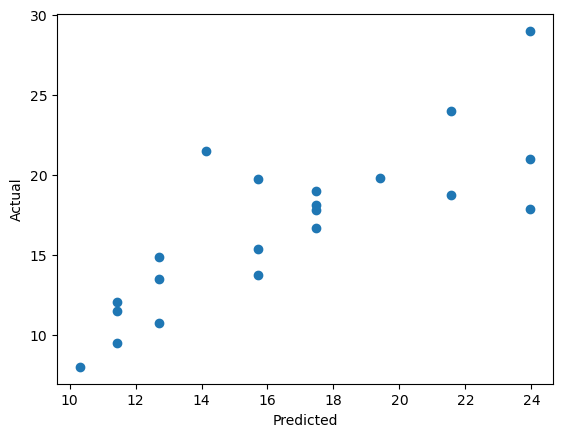

In [29]:
plt.scatter(x= pred3,y=del_time.DTime)
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [30]:
#quadratic model 
STime_sq=del_time.STime*del_time.STime
model_quad= smf.ols("DTime~STime+STime_sq",data = del_time).fit()

In [31]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DTime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.39e-05
Time:                        18:47:12   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5222      4.160      0.847      0.408      -5.217      12.261
STime          2.8130      1.461      1.926      0.070      -0.256       5.882
STime_sq      -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred_quad = model_quad.predict(del_time.STime)

In [33]:
pred_quad

0     22.332430
1     13.283069
2     17.045108
3     21.290194
4     22.332430
5     17.045108
6     18.646533
7     11.122455
8     22.332430
9     21.290194
10    20.061562
11    13.283069
12    18.646533
13    11.122455
14    11.122455
15    13.283069
16    17.045108
17    18.646533
18     8.775444
19    18.646533
20    15.257287
dtype: float64

Text(0, 0.5, 'actual')

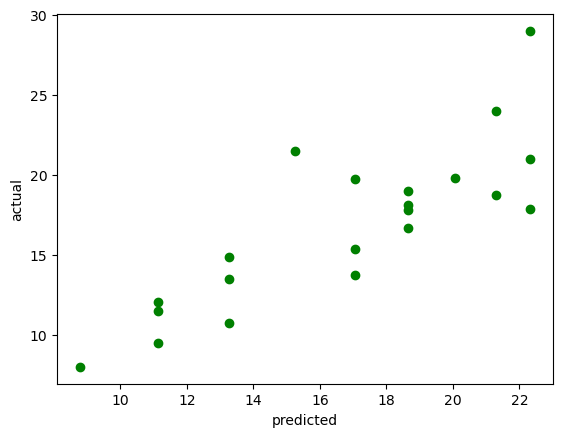

In [34]:
plt.scatter(x=pred_quad ,y=del_time.DTime,color = 'green')
plt.xlabel("predicted")
plt.ylabel("actual")

In [35]:
#x^4 model
STime_p4=del_time.STime*del_time.STime*del_time.STime*del_time.STime
model_p4= smf.ols("DTime~STime+STime_p4",data = del_time).fit()

In [36]:
model_p4.params

Intercept    5.161203
STime        2.020543
STime_p4    -0.000296
dtype: float64

In [37]:
model_p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DTime   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     19.98
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.68e-05
Time:                        18:47:12   Log-Likelihood:                -51.116
No. Observations:                  21   AIC:                             108.2
Df Residuals:                      18   BIC:                             111.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1612      2.809      1.838      0.083      -0.739      11.062
STime          2.0205      0.631      3.200      0.005       0.694       3.347
STime_p4      -0.0003      0.000     -0.647      0.526      -0.001       0.001
==============================================================================
Omnibus:                        5.455   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.456
Skew:                           0.953   Prob(JB):                        0.178
Kurtosis:                       3.560   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
pred4=model_p4.predict(del_time['STime'])
pred4

0     22.408765
1     13.167654
2     16.901122
3     21.405433
4     22.408765
5     16.901122
6     18.594820
7     11.198874
8     22.408765
9     21.405433
10    20.114004
11    13.167654
12    18.594820
13    11.198874
14    11.198874
15    13.167654
16    16.901122
17    18.594820
18     9.197557
19    18.594820
20    15.079052
dtype: float64

Text(0, 0.5, 'actual')

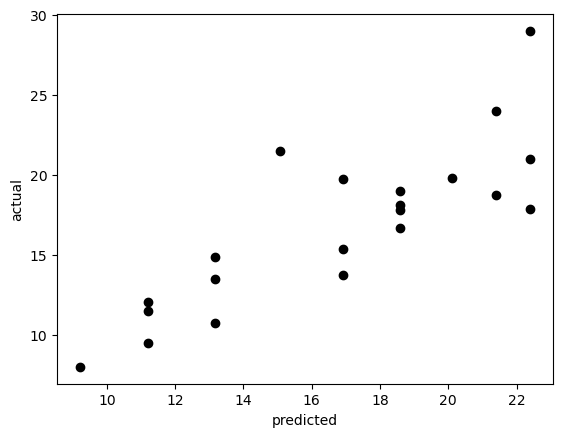

In [39]:
plt.scatter(x=pred4 ,y=del_time.DTime,color = 'black')
plt.xlabel("predicted")
plt.ylabel("actual")

# Fitting a Linear regression model 

In [40]:
import seaborn as sns
model3= smf.ols('np.log(DTime)~STime',data = del_time).fit()

<AxesSubplot:ylabel='DTime'>

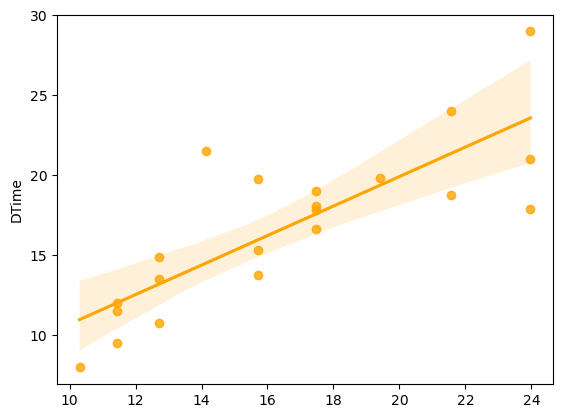

In [41]:
sns.regplot(x=pred3,y=del_time.DTime,data = del_time,color='orange')

In [42]:
#rsquared values
(model3.rsquared,model3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [43]:
model3.params

Intercept    2.121372
STime        0.105552
dtype: float64

In [44]:
print(model3.tvalues, "\n",model3.pvalues)

Intercept    20.601357
STime         6.836088
dtype: float64 
 Intercept    1.857343e-14
STime        1.592708e-06
dtype: float64
